In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np

import sys
sys.path.append('../')
import compression as C
import cPickle as pickle

from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
%matplotlib inline

colors_3 = ['#000000', '#666666', '#666666']

/home/d/nolearn/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# Load CYLINDER: ALL

with open('/home/d/data/cyl_results_all.p', 'rb') as f:
    results_cyl_all = pickle.load(f)

In [3]:
# Load CYLINDER: ENC ONLY

with open('/home/d/data/cyl_results_enc_only.p', 'rb') as f:
    results_cyl_enc_only = pickle.load(f)

In [21]:
# Plot results for experiments setup: all

def plot_all(results, what, x_range=None, y_range=None, name=None, leg=True, leg_loc='right', no_bw=True):
    
    if name is None:
        raise ValueError('Holy Moly you haven\'t specified a `name`! Shame on you.')
        
    if what not in results:
        raise ValueError('Wrong `what` parameter. Not found in `results`.')
    
    labels = []

    for i, method in enumerate(results['methods']):
        labels.append(method.split('\n')[0])
    
    labels = sorted(list(set(labels)), key=lambda s: s.lower())

    ne = [0]*len(labels)
    rle = [0]*len(labels)
    ng = [0]*len(labels)
    bockwurst = [0]*len(labels)
    
    if what == 'bytes':
        input_bytes = C.Util.get_size(results['bytes'][0])
        bytes = [C.Util.get_size(v) for v in results['bytes'][1:]]

    for i, label in enumerate(labels):

        ne_index = label
        
        if ne_index in results['methods']:
            ne_index = results['methods'].index(ne_index)
        else:
            ne_index = -1
            
        rle_index = label + '\n with RLE'
        
        if rle_index in results['methods']:
            rle_index = results['methods'].index(rle_index)
        else:
            rle_index = -1
            
        ng_index = label + '\n with Neuroglancer'
        
        if ng_index in results['methods']:
            ng_index = results['methods'].index(ng_index)    
        else:
            ng_index = -1        
            
        bockwurst_index = label + '\n with Bockwurst'
        
        if bockwurst_index in results['methods']:
            bockwurst_index = results['methods'].index(bockwurst_index)   
        else:
            bockwurst_index = -1
        
        if what == 'bytes':
            if ne_index != -1:
                ne[i] = bytes[ne_index]
            if rle_index != -1:
                rle[i] = bytes[rle_index]
            if ng_index != -1:
                ng[i] = bytes[ng_index]
            if bockwurst_index != -1:
                bockwurst[i] = bytes[bockwurst_index]
        else:
            if ne_index != -1:
                ne[i] = results[what][ne_index]
            if rle_index != -1:
                rle[i] = results[what][rle_index]
            if ng_index != -1:
                ng[i] = results[what][ng_index]
            if bockwurst_index != -1:
                bockwurst[i] = results[what][bockwurst_index]
            

    plt.figure(figsize=(10,10))
    N = len(labels)
    ind = np.arange(N)  # the x locations for the groups
    width = 0.2       # the width of the bars

    font = {
        'family': 'sans-serif',
        'size': 13.5
    }
    plt.rc('font', **font)
    
    #ne_width = [width * 1.5] + [width] * (len(ne) - 1)
    #ne_colors = ['#000000'] + ['#b2b2b2'] * (len(ne) - 1)
    
    if no_bw:
        ind = ind[1:]
        ne = ne[1:]
        rle = rle[1:]
        ng = ng[1:]
        bockwurst = bockwurst[1:]
        labels = labels[1:]
    
    lab_ne = 'No encoding'
    lab_rle = 'RLE'
    lab_ng = 'Neuroglancer'
    lab_bw = 'Bockwurst'
        
    if what == 'bytes':
        lab_ne = None
        lab_rle = None
        lab_ng = None
        lab_bw = None

    fig, ax=plt.subplots()
    data1 = ax.bar(ind, ne, width, color='#b2b2b2', label=lab_ne, edgecolor='#ffffff')
    data2 = ax.bar(ind + width, rle, width, color='#8c8c8c', label=lab_rle, edgecolor='#ffffff')
    data3 = ax.bar(ind + width * 2, ng, width, color='#666666', label=lab_ng, edgecolor='#ffffff')
    data4 = ax.bar(ind + width * 3, bockwurst, width, color='#dc133b', label=lab_bw, edgecolor='#ffffff')
    
    if what == 'bytes':
        ax.axhline(y=input_bytes, color='gray', label='Input', linewidth=2, linestyle='--')

    ax.tick_params(color='#333333', labelcolor='#333333')
    for spine in ax.spines.values():
        spine.set_edgecolor('#cccccc')
        
    ylabel = 'Compression Ratio\n(Original / Compressed)'
    
    if what.endswith('comp_speed'):
        ylabel = 'Compression Speed\n(MB/s)'
    
    if what.endswith('decomp_speed'):
        ylabel = 'Decompression Speed\n(MB/s)'
    
    if what.endswith('bytes'):
        ylabel = 'Size\n(MB)'
        ax.set_yscale('log', nonposy='clip')

    plt.ylabel(ylabel)

    if leg:
        leg = plt.legend(
        loc='upper %s' % leg_loc,
            prop={
                'size': 13
            }
        )
        if what != 'bytes':
            leg.legendHandles[0].set_color('#b2b2b2')
            leg.legendHandles[1].set_color('#8c8c8c')
            leg.legendHandles[2].set_color('#666666')
            leg.legendHandles[3].set_color('#dc133b')
        frm = leg.get_frame()
        frm.set_edgecolor('#f5f5f5')
        frm.set_facecolor('#f5f5f5')

    v = ax.set_xticks(ind + width)
    v = ax.set_xticklabels(labels, rotation = 'vertical')
    
    if y_range is not None:
        plt.ylim(y_range)
    
    if no_bw:
        plt.xlim(0.5, len(ne) + 1)
    else:
        plt.xlim(-0.5, len(ne) + 0.5)
    
    plt.tick_params(
        axis='x',
        which='both',
        bottom='off',
        top='off'
    )
    
    plt.savefig(
        '/home/d/Projects/cs222finalproject/PAPER/gfx/%s_compression_%s.pdf' % (name, what),
        bbox_inches='tight'
    )

In [ ]:
results_cyl_all

In [24]:
results_cyl_all['ratios']

[898.1282855643944,
 361.4556281602992,
 305.1021989189079,
 323.15127472358563,
 859.5233106257887,
 6.6768293357534585,
 202.15973269036354,
 470.1766874170994,
 504.9044043516861,
 1939.2016052503525,
 345.9171294093196,
 859.837393040619,
 500.24258933704175,
 844.2080135578756,
 65.65338363368349,
 149.47623851100525,
 120.26467780778603,
 377.7171158786611,
 10.033444664043369,
 140.07207979522374,
 154.25092496957222,
 497.5417123613073,
 163.8197625000427,
 22.62575849495128,
 139.16120145740388,
 266.2617377746855,
 304.6649990239296,
 560.4295780881771,
 194.09571154303353,
 380.8762925097715,
 309.19742214091906,
 568.9014277454982]

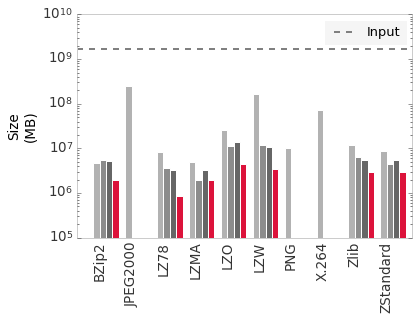

In [22]:
plot_all(results_cyl_all, what='bytes', name='cyl')

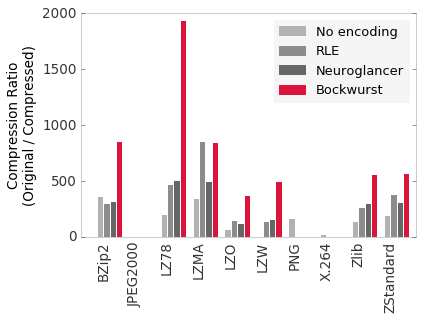

In [23]:
plot_all(results_cyl_all, what='ratios', name='cyl')

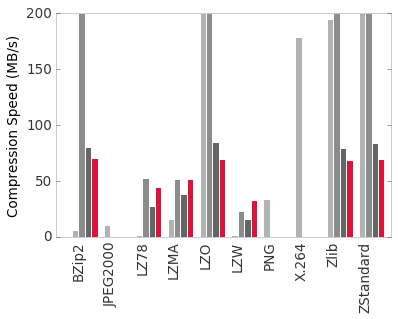

In [14]:
plot_all(results_cyl_all, what='total_comp_speed', name='cyl', leg=False, y_range=[0,200])

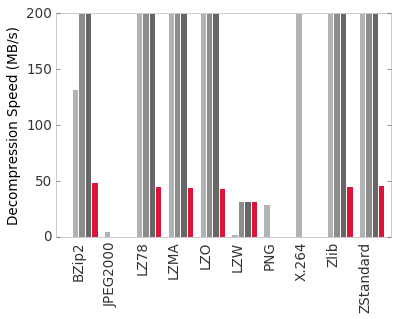

In [9]:
plot_all(results_cyl_all, what='total_decomp_speed', name='cyl', leg=False, y_range=[0,200])

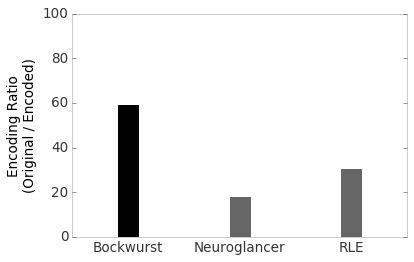

In [10]:
labels = []

results = results_cyl_enc_only

for i,m in enumerate(results['methods']):
    labels.append(m.split('\n')[0])
    
labels = sorted(list(set(labels)), key=lambda s: s.lower())

ne = [0]*len(labels)
rle = [0]*len(labels)
ng = [0]*len(labels)
bockwurst = [0]*len(labels)


what = 'ratios'
for i,m in enumerate(labels):

    ne_index = m
    if ne_index in results['methods']:
        ne_index = results['methods'].index(ne_index)
    else:
        ne_index = -1
    rle_index = m+'\n with RLE'
    if rle_index in results['methods']:
        rle_index = results['methods'].index(rle_index)
    else:
        rle_index = -1
    ng_index = m+'\n with Neuroglancer'
    if ng_index in results['methods']:
        ng_index = results['methods'].index(ng_index)    
    else:
        ng_index = -1        
    bockwurst_index = m+'\n with Bockwurst'
    if bockwurst_index in results['methods']:
        bockwurst_index = results['methods'].index(bockwurst_index)   
    else:
        bockwurst_index = -1        
    
    if ne_index != -1:
        ne[i] = results[what][ne_index]
    if rle_index != -1:
        rle[i] = results[what][rle_index]
    if ng_index != -1:
        ng[i] = results[what][ng_index]
    if bockwurst_index != -1:
        bockwurst[i] = results[what][bockwurst_index]

plt.figure(figsize=(10,10))
N = len(labels)
ind = np.arange(N)  # the x locations for the groups
width = 0.2       # the width of the bars

fig, ax=plt.subplots()
data1 = ax.bar(ind, ne, width, color=colors_3, label='No encoding', align='center', edgecolor='#ffffff')
# data2 = ax.bar(ind+ width, rle, width, color='g', label='RLE')
# data3 = ax.bar(ind+ width*2, ng, width, color='b', label='Neuroglancer')
# data4 = ax.bar(ind+ width*3, bockwurst, width, color='y', label='Bockwurst')

plt.ylabel('Encoding Ratio\n(Original / Encoded)')

# plt.legend(
#     loc='upper right'
# )

ax.set_ylim(0,100)

v = ax.set_xticks(ind)# + width)
v = ax.set_xticklabels(labels)#, rotation = 'vertical')

ax.tick_params(color='#333333', labelcolor='#333333')
for spine in ax.spines.values():
    spine.set_edgecolor('#cccccc')
    
plt.tick_params(
    axis='x',
    which='both',
    bottom='off',
    top='off'
)

plt.savefig('/home/d/Projects/cs222finalproject/PAPER/gfx/cyl_enconly_ratio.pdf',bbox_inches='tight')
        

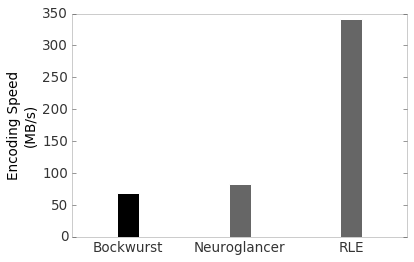

In [11]:
labels = []

results = results_cyl_enc_only

for i,m in enumerate(results['methods']):
    labels.append(m.split('\n')[0])
    
labels = sorted(list(set(labels)), key=lambda s: s.lower())

ne = [0]*len(labels)
rle = [0]*len(labels)
ng = [0]*len(labels)
bockwurst = [0]*len(labels)


what = 'total_comp_speed'
for i,m in enumerate(labels):

    ne_index = m
    if ne_index in results['methods']:
        ne_index = results['methods'].index(ne_index)
    else:
        ne_index = -1
    rle_index = m+'\n with RLE'
    if rle_index in results['methods']:
        rle_index = results['methods'].index(rle_index)
    else:
        rle_index = -1
    ng_index = m+'\n with Neuroglancer'
    if ng_index in results['methods']:
        ng_index = results['methods'].index(ng_index)    
    else:
        ng_index = -1        
    bockwurst_index = m+'\n with Bockwurst'
    if bockwurst_index in results['methods']:
        bockwurst_index = results['methods'].index(bockwurst_index)   
    else:
        bockwurst_index = -1        
    
    if ne_index != -1:
        ne[i] = results[what][ne_index]
    if rle_index != -1:
        rle[i] = results[what][rle_index]
    if ng_index != -1:
        ng[i] = results[what][ng_index]
    if bockwurst_index != -1:
        bockwurst[i] = results[what][bockwurst_index]

plt.figure(figsize=(10,10))
N = len(labels)
ind = np.arange(N)  # the x locations for the groups
width = 0.2       # the width of the bars

fig, ax=plt.subplots()
data1 = ax.bar(ind, ne, width, color=colors_3, label='No encoding', align='center', edgecolor='#ffffff')
# data2 = ax.bar(ind+ width, rle, width, color='g', label='RLE')
# data3 = ax.bar(ind+ width*2, ng, width, color='b', label='Neuroglancer')
# data4 = ax.bar(ind+ width*3, bockwurst, width, color='y', label='Bockwurst')

plt.ylabel('Encoding Speed\n(MB/s)')

# plt.legend(
#     loc='upper right'
# )

# ax.set_ylim(0,100)

v = ax.set_xticks(ind)# + width)
v = ax.set_xticklabels(labels)#, rotation = 'vertical')

ax.tick_params(color='#333333', labelcolor='#333333')
for spine in ax.spines.values():
    spine.set_edgecolor('#cccccc')
    
plt.tick_params(
    axis='x',
    which='both',
    bottom='off',
    top='off'
)     
        
plt.savefig('/home/d/Projects/cs222finalproject/PAPER/gfx/cyl_enconly_encodingspeed.pdf',bbox_inches='tight')

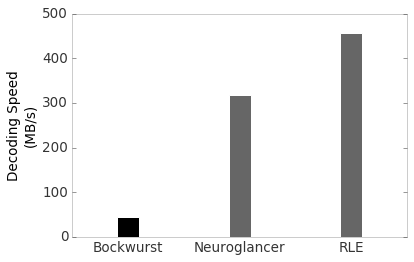

In [12]:
labels = []

results = results_cyl_enc_only

for i,m in enumerate(results['methods']):
    labels.append(m.split('\n')[0])
    
labels = sorted(list(set(labels)), key=lambda s: s.lower())

ne = [0]*len(labels)
rle = [0]*len(labels)
ng = [0]*len(labels)
bockwurst = [0]*len(labels)


what = 'total_decomp_speed'
for i,m in enumerate(labels):

    ne_index = m
    if ne_index in results['methods']:
        ne_index = results['methods'].index(ne_index)
    else:
        ne_index = -1
    rle_index = m+'\n with RLE'
    if rle_index in results['methods']:
        rle_index = results['methods'].index(rle_index)
    else:
        rle_index = -1
    ng_index = m+'\n with Neuroglancer'
    if ng_index in results['methods']:
        ng_index = results['methods'].index(ng_index)    
    else:
        ng_index = -1        
    bockwurst_index = m+'\n with Bockwurst'
    if bockwurst_index in results['methods']:
        bockwurst_index = results['methods'].index(bockwurst_index)   
    else:
        bockwurst_index = -1        
    
    if ne_index != -1:
        ne[i] = results[what][ne_index]
    if rle_index != -1:
        rle[i] = results[what][rle_index]
    if ng_index != -1:
        ng[i] = results[what][ng_index]
    if bockwurst_index != -1:
        bockwurst[i] = results[what][bockwurst_index]

plt.figure(figsize=(10,10))
N = len(labels)
ind = np.arange(N)  # the x locations for the groups
width = 0.2       # the width of the bars

fig, ax=plt.subplots()
data1 = ax.bar(ind, ne, width, color=colors_3, label='No encoding', align='center', edgecolor='#ffffff')
# data2 = ax.bar(ind+ width, rle, width, color='g', label='RLE')
# data3 = ax.bar(ind+ width*2, ng, width, color='b', label='Neuroglancer')
# data4 = ax.bar(ind+ width*3, bockwurst, width, color='y', label='Bockwurst')

plt.ylabel('Decoding Speed\n(MB/s)')

# plt.legend(
#     loc='upper right'
# )

# ax.set_ylim(0,100)

v = ax.set_xticks(ind)# + width)
v = ax.set_xticklabels(labels)#, rotation = 'vertical')  

ax.tick_params(color='#333333', labelcolor='#333333')
for spine in ax.spines.values():
    spine.set_edgecolor('#cccccc')
    
plt.tick_params(
    axis='x',
    which='both',
    bottom='off',
    top='off'
)   
        
plt.savefig('/home/d/Projects/cs222finalproject/PAPER/gfx/cyl_enconly_decodingspeed.pdf',bbox_inches='tight')

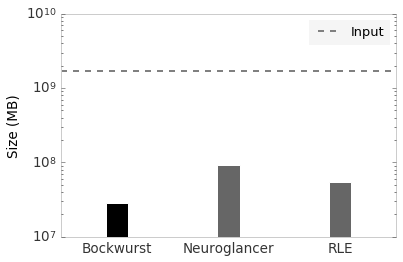

In [13]:
labels = []

results = results_cyl_enc_only

labels = results['methods']

bytes = [C.Util.get_size(v) for v in results['bytes'][1:]]

labels, bytes = zip(*sorted(zip(labels, bytes)))

input_bytes = len(results['bytes'][0])

plt.figure(figsize=(10,10))
N = len(labels)
ind = np.arange(N)  # the x locations for the groups
width = 0.2       # the width of the bars

fig, ax=plt.subplots()
data1 = ax.bar(ind, bytes, width, color=colors_3, align='center', edgecolor='#ffffff')

ax.axhline(y=input_bytes, color='gray', label='Input', linewidth=2, linestyle='--')

plt.ylabel('Size (MB)')
ax.set_yscale("log", nonposy='clip')


leg = plt.legend(
    loc='upper right',
    prop={
        'size': 13
    }
)
frm = leg.get_frame()
frm.set_edgecolor('#f5f5f5')
frm.set_facecolor('#f5f5f5')

v = ax.set_xticks(ind)# + width)
v = ax.set_xticklabels(labels)#, rotation = 'vertical')  

ax.tick_params(color='#333333', labelcolor='#333333')
for spine in ax.spines.values():
    spine.set_edgecolor('#cccccc')
    
plt.tick_params(
    axis='x',
    which='both',
    bottom='off',
    top='off'
)
        
plt.savefig('/home/d/Projects/cs222finalproject/PAPER/gfx/cyl_enconly_bytes.pdf',bbox_inches='tight')